<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/Multi_Agent_Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install langgraph
!pip install langchain_groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 4.5 MB/s eta 0:00:00


In [10]:
from typing import List, Optional, TypedDict

## STATE MANAGEMENT

In [11]:
class AgentState(TypedDict, total=False):   #not necessary all variable are to be present
    user_input: str #var1
    task_list: List[str] #var2
    final_output: Optional[str] #var3

## create api key
 https://console.groq.com/home

In [12]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KEY')

In [27]:
from langchain_groq import ChatGroq   #chatgrok is a class
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.1-8b-instant")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7bd0a2906780>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7bd0a29074a0>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

## CreatingAI agent 1-Planner Node

In [28]:
def planner_node(state: dict) -> dict:
    prompt = f"Break this task into 2-3 steps: {state['user_input']}"
    response  = llm.invoke(prompt)  # Assuming you have a function defined to call the LLM
    steps = response.content   #rough content

    step_lines = [line.strip("- ").strip() for line in steps.split("\n") if line.strip()]
    print("Planner Output:", step_lines)
    print("Planner just Rough steps :", steps)
    return {"task_list": step_lines}

## CreatingAI agent 2-Executor Node

In [29]:
def executor_node(state: dict) -> dict:
    steps = state.get("task_list", [])
    final_output = " -> ".join(steps) + " -> Done!"
    return {"final_output": final_output}

## Create Langgraph

In [30]:
import langgraph.graph

In [31]:
from langgraph.graph import StateGraph

In [32]:
graph = StateGraph(state_schema=AgentState)

In [33]:
graph.add_node("planner", planner_node)
graph.add_node("executor", executor_node)

graph.set_entry_point("planner")
graph.add_edge("planner", "executor")
graph.set_finish_point("executor")

In [34]:
graph_compiled = graph.compile()

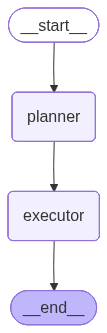

In [35]:

from IPython.display import Image, display
try:
    display(Image(graph_compiled.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [36]:
state = {"user_input": "How do solar panels work?"}
final_state = graph_compiled.invoke(state)

Planner Output: ["Here's a 3-step explanation of how solar panels work:", '**Step 1: Absorbing Sunlight**', 'Solar panels are made up of many small photovoltaic (PV) cells, typically silicon-based, that convert sunlight into electrical energy. When sunlight hits a PV cell, it excites the electrons in the material, causing them to flow freely. This flow of electrons is called an electric current.', '**Step 2: Converting Sunlight into Electricity**', 'The PV cells in a solar panel are connected together in a specific pattern to create an electric circuit. When sunlight hits the PV cells, it generates a direct current (DC) electricity. This DC electricity is then sent through a process called inverter conversion, which converts the DC electricity into alternating current (AC) electricity, the type of electricity used in homes and businesses.', '**Step 3: Powering Electrical Devices**', 'Finally, the AC electricity generated by the solar panel is fed into the electrical grid or used to pow

In [39]:
state = {"user_input": "What are the stesp in Retail market end to end deployment in Lowes company?"}
final_state = graph_compiled.invoke(state)

Planner Output: ["Here are the steps involved in the retail market end-to-end deployment in Lowe's company:", '**Step 1: Planning and Inventory Management (Pre-Deployment)**', "1. **Inventory Planning**: Lowe's procurement team identifies the products needed, including new products, seasonal items, and products with high demand.", '2. **Warehouse and Logistics**: The products are received at the distribution center, where they are stored, inspected, and prepared for shipping to stores.', '3. **Store Level Inventory**: The products are received at the store level, where they are stocked on shelves and made available for customers.', '4. **Point of Sale (POS) System**: The POS system is configured to manage inventory levels, track sales, and process refunds and exchanges.', '**Step 2: In-Store Execution (Deployment)**', '1. **Store Setup**: Merchandisers and store managers ensure that products are properly stocked, displayed, and priced.', '2. **Sales Floor Execution**: Sales associates 

In [40]:
print(final_state["final_output"])

Here are the steps involved in the retail market end-to-end deployment in Lowe's company: -> **Step 1: Planning and Inventory Management (Pre-Deployment)** -> 1. **Inventory Planning**: Lowe's procurement team identifies the products needed, including new products, seasonal items, and products with high demand. -> 2. **Warehouse and Logistics**: The products are received at the distribution center, where they are stored, inspected, and prepared for shipping to stores. -> 3. **Store Level Inventory**: The products are received at the store level, where they are stocked on shelves and made available for customers. -> 4. **Point of Sale (POS) System**: The POS system is configured to manage inventory levels, track sales, and process refunds and exchanges. -> **Step 2: In-Store Execution (Deployment)** -> 1. **Store Setup**: Merchandisers and store managers ensure that products are properly stocked, displayed, and priced. -> 2. **Sales Floor Execution**: Sales associates are trained to ass